In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def convoy_dynamics(t,Z, N, b, c, T, v_f):
    A = np.array([[0, 1], [-c, -b]])
    B = np.array([[0, 0], [c, b - c * T]])
    M = np.zeros((2 * N, 2 * N))
    for i in range(N - 1):
        M[2 * i:2 * i + 2, 2 * i:2 * i + 2] = A
        M[2 * i:2 * i + 2, 2 * i + 2:2 * i + 4] = B
    M[2 * (N - 1):2 * N, 2 * (N - 1):2 * N] = A
    F = np.zeros(2 * N)
    F[2 * (N-1) + 1] = c * T * v_f
    return M.dot(Z) + F

def simulate_convoy(N, b, c=3.0, T=1.0, t_end=60):
    initial_spacing = 30
    initial_velocity = 20
    v_f = initial_velocity
    Z0 = np.zeros(2 * N)
    Z0[0::2] = initial_spacing * np.ones(N)
    Z0[1::2] = initial_velocity - np.zeros(N)

    solution = solve_ivp(convoy_dynamics, [0, t_end], Z0, args=(N, b, c, T, v_f), dense_output=True)
    t = np.linspace(0, t_end, 300)
    Z = solution.sol(t)
    return t, Z


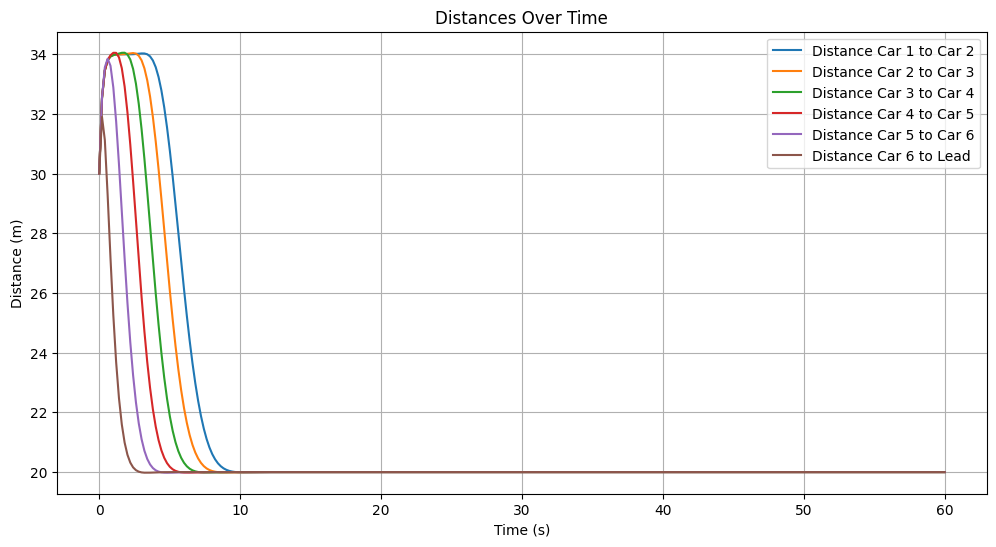

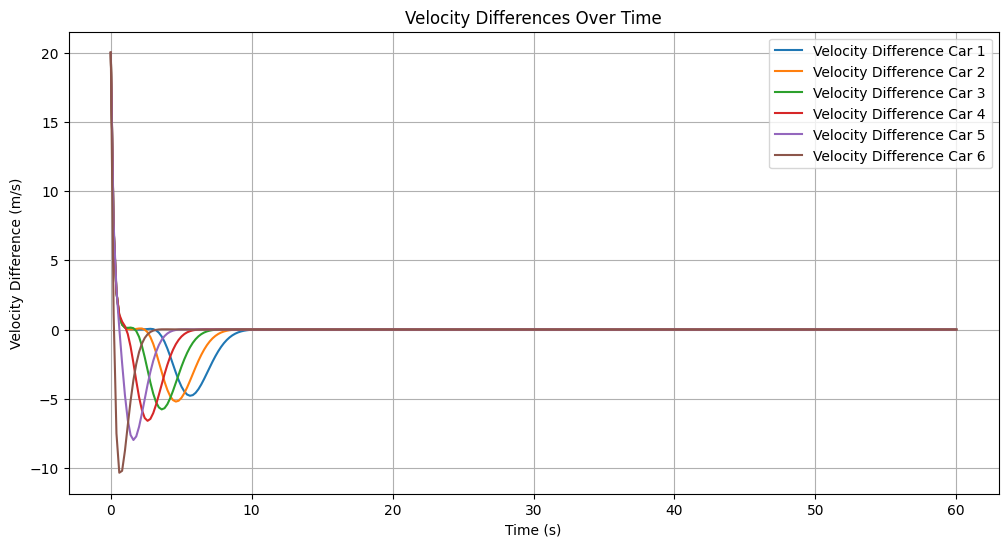

In [20]:
# Parameters for simulation
N = 6
b = 4.0
c = 5.0
T = 1.0
t_end = 60

# Run the simulation
t, Z = simulate_convoy(N, b, c, T, t_end)

# Plotting the results for distances
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(t, Z[2*i], label=f'Distance Car {i+1} to Car {i+2}' if i < N-1 else f'Distance Car {i+1} to Lead')
plt.title('Distances Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for velocity differences
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(t, Z[2*i+1], label=f'Velocity Difference Car {i+1}')
plt.title('Velocity Differences Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity Difference (m/s)')
plt.legend()
plt.grid(True)
plt.show()

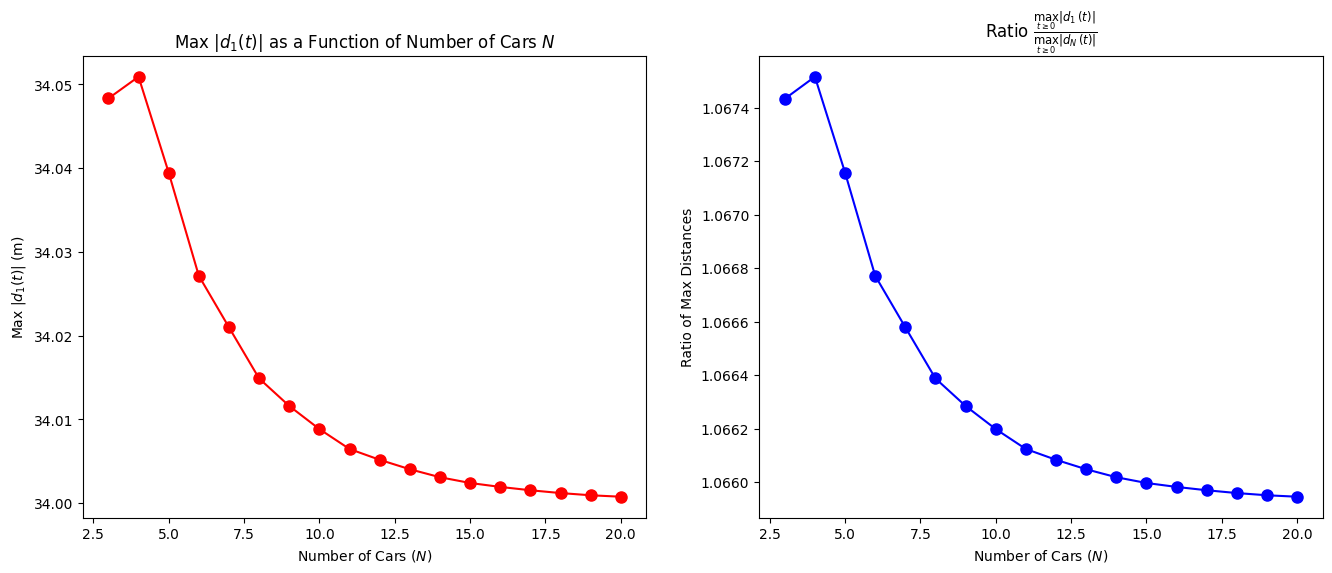

In [29]:
N_range = range(3, 21)  # Extended range for more data points

max_d1_values = []
max_dN_values = []
for N in N_range:
    t, Z = simulate_convoy(N, b, c, T, t_end)
    max_d1 = np.max(np.abs(Z[0]))
    max_dN = np.max(np.abs(Z[2*(N-1)])) 
    max_d1_values.append(max_d1)
    max_dN_values.append(max_dN)



ratio = np.array(max_d1_values) / np.array(max_dN_values)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6)) 

ax1.plot(list(N_range), ratio, marker='o', linestyle='-', color='blue', markersize=8)
ax1.set_title(r'Ratio $\frac{\max_{t \geq 0} |d_1(t)|}{\max_{t \geq 0} |d_N(t)|}$ as a Function of $N$')
ax1.set_xlabel('Number of Cars ($N$)')
ax1.set_ylabel('Ratio of Max Distances')

ax2.plot(list(N_range), max_d1_values, marker='o', linestyle='-', color='red', markersize=8)
ax2.set_title('Max $|d_1(t)|$ as a Function of $N$')
ax2.set_xlabel('Number of Cars ($N$)')
ax2.set_ylabel('Max $|d_1(t)|$ (m)')


plt.show()
